In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ezc3d import c3d
from scipy.signal import resample
from scipy.io import loadmat, savemat

In [10]:
PATH_DATASETS = '../../Dataset/'
PATH_DATASET_1 = 'gait-dbase-1/'
PATH_DATASET_2 = 'gait-dbase-2/'

N_SAMPLES = 256

In [11]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_1)
subjects = os.listdir(path)

features = pd.DataFrame()
target = pd.DataFrame()

for subject in subjects:
    files_path = os.path.join(path, subject)
    files = os.listdir(files_path)
    for filename in files:

        try:
            content = c3d(os.path.join(path, subject, filename), extract_forceplat_data=True)
            trajectory_x = content['data']['points'][1, 9:15, :]
            trajectory_y = content['data']['points'][1, 9:15, :]
            trajectory_z = content['data']['points'][2, 9:15, :]

            trajectory_x = resample(trajectory_x, N_SAMPLES, axis=1).T
            trajectory_y = resample(trajectory_y, N_SAMPLES, axis=1).T
            trajectory_z = resample(trajectory_z, N_SAMPLES, axis=1).T
            
            _features = pd.DataFrame(
                np.concatenate([trajectory_x, trajectory_y, trajectory_z], axis=1),
                columns=[
                    'lfal_x', 'ltam_x', 'lfcc_x', 'lfm1_x', 'lfm2_x', 'lfm5_x',
                    'lfal_y', 'ltam_y', 'lfcc_y', 'lfm1_y', 'lfm2_y', 'lfm5_y',
                    'lfal_z', 'ltam_z', 'lfcc_z', 'lfm1_z', 'lfm2_z', 'lfm5_z'
                ]
            )

            force_x = content['data']['platform'][0]['force'][0, :]
            force_y = content['data']['platform'][0]['force'][1, :]
            force_z = content['data']['platform'][0]['force'][2, :]

            force_x = resample(force_x, N_SAMPLES, axis=0).T
            force_y = resample(force_y, N_SAMPLES, axis=0).T
            force_z = resample(force_z, N_SAMPLES, axis=0).T

            _target = pd.DataFrame(
                np.stack([force_x, force_y, force_z], axis=1),
                columns=['fx', 'fy', 'fz']
            )

            features = pd.concat([features, _features], axis=0)
            target = pd.concat([target, _target], axis=0)

        except:
            print('Error occured')



Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured


In [15]:
features

,lfal_x,ltam_x,lfcc_x,lfm1_x,lfm2_x,lfm5_x,lfal_y,ltam_y,lfcc_y,lfm1_y,lfm2_y,lfm5_y,lfal_z,ltam_z,lfcc_z,lfm1_z,lfm2_z,lfm5_z
0,315.077850,229.390457,266.381287,249.976181,307.238617,358.050293,315.077850,229.390457,266.381287,249.976181,307.238617,358.050293,75.325401,92.450508,39.130699,22.079981,35.831905,21.600080
1,313.162473,227.252454,264.989597,248.522765,305.844398,357.182654,313.162473,227.252454,264.989597,248.522765,305.844398,357.182654,77.704683,93.378374,42.899788,18.604518,33.062358,20.060689
2,316.499925,230.992649,267.435308,251.468414,308.434996,358.003072,316.499925,230.992649,267.435308,251.468414,308.434996,358.003072,78.149418,95.921182,43.085938,25.705894,38.769354,23.723877
3,313.599961,227.730821,265.426522,249.091497,306.223646,356.782663,313.599961,227.730821,265.426522,249.091497,306.223646,356.782663,81.386422,96.979130,48.243623,19.965664,34.197936,21.135948
4,315.131842,229.420151,266.662187,250.401585,307.357467,356.988098,315.131842,229.420151,266.662187,250.401585,307.357467,356.988098,83.030945,99.414599,50.432506,23.018537,36.671556,22.867096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,339.544002,433.454385,393.523331,426.433583,369.318836,323.920595,339.544002,433.454385,393.523331,426.433583,369.318836,323.920595,75.565668,100.520780,14.091953,90.717551,105.824282,74.258110
252,342.156304,436.212547,395.833217,430.274315,373.189537,327.169548,342.156304,436.212547,395.833217,430.274315,373.189537,327.169548,72.004508,96.864258,11.649116,83.798473,99.285832,68.356991
253,342.549108,436.755981,395.691684,431.696727,374.705151,328.921670,342.549108,436.755981,395.691684,431.696727,374.705151,328.921670,68.544188,93.118703,7.671108,79.727802,95.279115,64.139924
254,345.482244,440.008664,397.987700,437.169685,380.225551,333.317661,345.482244,440.008664,397.987700,437.169685,380.225551,333.317661,65.679378,89.781342,7.096232,70.908270,86.946245,56.949544


In [16]:
target

,fx,fy,fz
0,-0.006323,-0.029060,-0.472606
1,0.007337,0.032162,0.525053
2,-0.008653,-0.036129,-0.592495
3,0.010417,0.041376,0.682268
4,-0.012889,-0.048625,-0.807338
...,...,...,...
251,-0.003455,-0.002067,0.028204
252,0.003404,0.002049,-0.029316
253,-0.003351,-0.002032,0.030372
254,0.003298,0.002013,-0.031374


In [25]:
features_t = features[0:291840]
target_t = target[0:291840]

Checkpoint = {}
Checkpoint['X'] = features_t['lfcc_z'].to_numpy().reshape(-1, 1024)
Checkpoint['Y'] = target_t['fz'].to_numpy().reshape(-1, 1024)

In [26]:
savemat('../../Dataset/Processed/data.mat', Checkpoint)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [66]:
X = features[['lfal_z', 'ltam_z', 'lfcc_z', 'lfm1_z', 'lfm2_z', 'lfm5_z']].to_numpy()
y = target[['fz']].to_numpy()

poly = PolynomialFeatures(1)
X = poly.fit_transform(X)

reg = LinearRegression(normalize=True)
reg.fit(X, y)

LinearRegression(normalize=True)

In [67]:
y_pred = reg.predict(X)

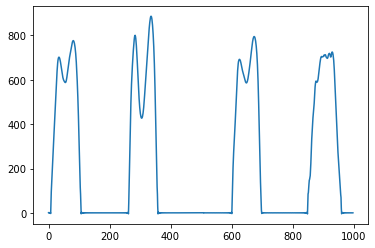

In [68]:
plt.plot(y[1:1000])

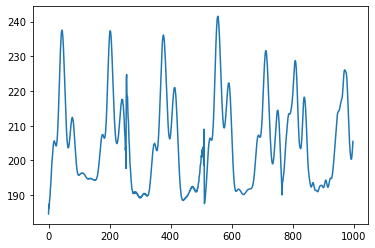

In [69]:
plt.plot(y_pred[1:1000])

In [70]:
import joblib

joblib.dump(features, '../../Dataset/Processed/Features.joblib')

['../../Dataset/Processed/Features.joblib']

In [71]:
joblib.dump(target, '../../Dataset/Processed/Target.joblib')

['../../Dataset/Processed/Target.joblib']

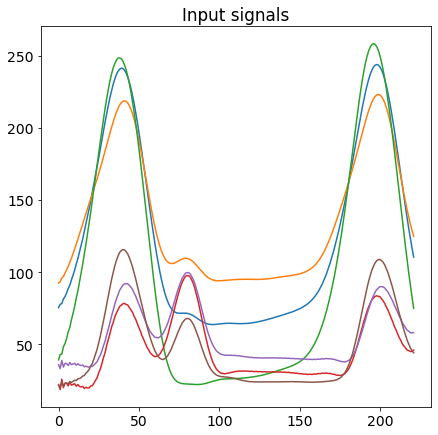

In [85]:
features_z = features[['lfal_z', 'ltam_z', 'lfcc_z', 'lfm1_z', 'lfm2_z', 'lfm5_z']]
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7, 7))
plt.plot(features_z[0:222])
plt.title('Input signals')
plt.show()

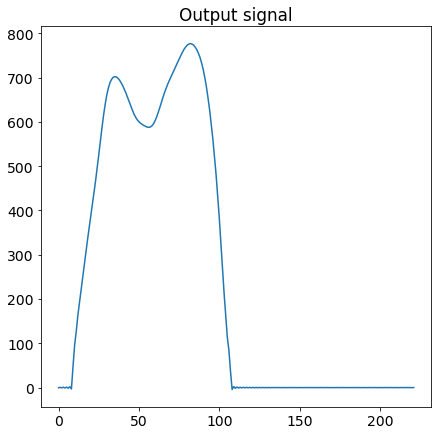

In [86]:
target_z = target[['fz']]
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7, 7))
plt.plot(target_z[0:222])
plt.title('Output signal')
plt.show()